# Forks Analysis

For each repository belonging to our Notebooks and Python dataset (corresponding splits: SE, Educational, SE_py and Educational SE_py), we collected up to 10 active forks available through GitHub API. And then, for each fork, we analyze how many of them have commits ahead of the original forked repository, and how many of its messages  are related to bugfixing.

The data analyzed in this notebook was generated using the `get_forks_info.py` script.

# Random Sample of Forks

Due to GitHub API requests limits, it wasn't possible to get all the information for all forks for each repository in our Notebooks and Python datasets.

To surpass this, we followed these steps:

- For all repositories included in the Notebooks and Python dataset,  we did a random sample of a maximum of 10 active forks for each repository.

- Not all repositories have at least 10 forks, so we always get the maximum number of forks available

- For each collected fork, we analyze how many commits they have in relation to the original forked repository, in all available branches. If they have commit messages ahead, we classify if the commit message is related to bugfixing.

In [40]:
import pandas as pd
import os
from pathlib import Path
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FuncFormatter
import pingouin as pg
from scipy.stats import mannwhitneyu
import numpy as np

## Auxiliar Functions

In [41]:
def merge_csv_results(folder_split):


    csv_files = [file for file in os.listdir(folder_split) if file.endswith('.csv')]

    dataframes = []

    for csv_file in csv_files:
        file_path = os.path.join(folder_split, csv_file)
        df = pd.read_csv(file_path)
        print(file_path)
        print(len(df))
        dataframes.append(df)

    merged_df = pd.concat(dataframes, ignore_index=True)

    merged_df.to_csv(f'forks_data_{folder_split}.csv', index=False)
    

    return merged_df



def get_mann_test_and_cohen_d(df_1, df_2, column_name):
    """Applies Mann-Whitney hipothesis testing to 2 group sets
    passed as input (2 dataframe columns passed as parameter).
    Also gets Cohen D coefficient between these 2 groups,
    that is a effect size measure if two groups have similar 
    standard deviations and are of the same size 
    """
    df_1 = df_1.dropna(subset=[column_name])
    df_2 = df_2.dropna(subset=[column_name])

    statistic, p_value = mannwhitneyu(df_1[column_name], df_2[column_name])
    print(f"Mann-Whitney U statistic: {statistic}")
    # printing more decimals:
    formatted_p_value = "{:.10f}".format(p_value)
    print(f"P-value: {formatted_p_value}")
    
    # returning the absolute value of cohen d:
    cohen_d = pg.compute_effsize(df_1[column_name], df_2[column_name], eftype='cohen')
    cohen_d = np.abs(cohen_d)
    print(f"Absolute value of cohen d: {cohen_d}")
    if cohen_d <= 0.2:
        print(f"Very small difference between Notebooks vs Python (cohen D <= 0.2)")
    if cohen_d > 0.2 and cohen_d <= 0.5:
        print(f"Small difference between Notebooks vs Python ( 0.2 > cohen D <= 0.5)")
    if cohen_d > 0.5 and cohen_d <= 0.8:
        print(f"Medium difference between Notebooks vs Python ( 0.5 > cohen D <= 0.8)")
    if cohen_d > 0.8:
        print(f"Big difference between Notebooks vs Python (cohen D > 0.8)")


### Analysis of the Notebook (SE) split:

In [42]:
df_forks_SE = merge_csv_results('SE')
print(f"\n *** \n Number of total forks* number of branches gathered for this split: {len(df_forks_SE)}")

SE/forks_SE_seed=15_random_sampling10_interval_(200, 300).csv
2121
SE/forks_SE_seed=15_random_sampling10_interval_(0, 30).csv
1122
SE/forks_SE_seed=15_random_sampling10_interval_(100, 200).csv
2588
SE/forks_SE_seed=15_random_sampling10_interval_(300, 376).csv
2062
SE/forks_SE_seed=15_random_sampling10_interval_(30, 100).csv
1569

 *** 
 Number of total forks* number of branches gathered for this split: 9462


In [43]:
df_forks_SE_def_branch = df_forks_SE[df_forks_SE['fork_branch_name'].isin(['master', 'main'])]
print(f"Number of total forks forked from default branches (main and/or master) \n gathered for this split: {len(df_forks_SE_def_branch )}")

Number of total forks forked from default branches (main and/or master) 
 gathered for this split: 3334


Columns of the dataframe:

In [44]:
df_forks_SE.columns

Index(['forked_from', 'full_name', 'owner', 'html_url', 'fork_branch_name',
       'created_at', 'updated_at', 'stargazers_count', 'watchers_count',
       'forks_count', 'commits_ahead_by', 'commit_msgs', 'number_bugfix_msgs',
       'bugfix_msgs'],
      dtype='object')

'Count', below, is the number of forks done in relation to default branches (main or master). The other metrics (mean, standard deviation, min, etc) represent the number of commits ahead the fork has in relation to its forked repository.

In [45]:
df_forks_SE_def_branch['commits_ahead_by'].describe()

count    3334.000000
mean        4.566887
std        22.396239
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max       886.000000
Name: commits_ahead_by, dtype: float64

'Count', below, is the number of forks done in relation to default branches (main or master). The other metrics (mean, standard deviation, min, etc) represent the number of commits ahead belonging to the fork project that are related to bugfixes:

In [46]:
df_forks_SE_def_branch['number_bugfix_msgs'].describe()

count    3334.000000
mean        0.389022
std         2.386860
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        51.000000
Name: number_bugfix_msgs, dtype: float64

### Analysis of the Notebook (Educational) split:

In [47]:
df_forks_non_SE = merge_csv_results('non_SE')
print(f"\n *** \n Number of total forks* number of branches gathered for this split: {len(df_forks_non_SE)}")

non_SE/forks_non_SE_seed=15_random_sampling10_interval_(100, 200).csv
2250
non_SE/forks_non_SE_seed=15_random_sampling10_interval_(300, 400).csv
1726
non_SE/forks_non_SE_seed=15_random_sampling10_interval_(500, 525).csv
328
non_SE/forks_non_SE_seed=15_random_sampling10_interval_(0, 100).csv
1961
non_SE/forks_non_SE_seed=15_random_sampling10_interval_(200, 300).csv
2263
non_SE/forks_non_SE_seed=15_random_sampling10_interval_(400, 500).csv
2130

 *** 
 Number of total forks* number of branches gathered for this split: 10658


In [48]:
df_forks_non_SE_def_branch = df_forks_non_SE[df_forks_non_SE['fork_branch_name'].isin(['master', 'main'])]
print(f"Number of total forks forked from default branches (main and/or master) \n gathered for this split: {len(df_forks_non_SE_def_branch )}")

Number of total forks forked from default branches (main and/or master) 
 gathered for this split: 4431


Columns of the dataframe:

In [49]:
df_forks_non_SE.columns

Index(['forked_from', 'full_name', 'owner', 'html_url', 'fork_branch_name',
       'created_at', 'updated_at', 'stargazers_count', 'watchers_count',
       'forks_count', 'commits_ahead_by', 'commit_msgs', 'number_bugfix_msgs',
       'bugfix_msgs'],
      dtype='object')

'Count', below, is the number of forks done in relation to default branches (main or master). The other metrics (mean, standard deviation, min, etc) represent the number of commits ahead the fork has in relation to its forked repository.

In [50]:
df_forks_non_SE_def_branch['commits_ahead_by'].describe()

count    4431.000000
mean        8.369443
std       124.696848
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max      4182.000000
Name: commits_ahead_by, dtype: float64

'Count', below, is the number of forks done in relation to default branches (main or master). The other metrics (mean, standard deviation, min, etc) represent the number of commits ahead belonging to the fork project that are related to bugfixes:

In [51]:
df_forks_non_SE_def_branch['number_bugfix_msgs'].describe()

count    4431.000000
mean        0.136764
std         1.345264
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        63.000000
Name: number_bugfix_msgs, dtype: float64

### Analysis of the Python (SE) split:

In [52]:
df_forks_SE_py = merge_csv_results('SE_py')
print(f"\n *** \n Number of total forks* number of branches gathered for this split: {len(df_forks_SE_py)}")

SE_py/forks_SE_py_seed=15_random_sampling10_interval_(100, 200).csv
2410
SE_py/forks_SE_py_seed=15_random_sampling10_interval_(300, 400).csv
2061
SE_py/forks_SE_py_seed=15_random_sampling10_interval_(500, 608).csv
3568
SE_py/forks_SE_py_seed=15_random_sampling10_interval_(400, 500).csv
3065
SE_py/forks_SE_py_seed=15_random_sampling10_interval_(200, 300).csv
2388
SE_py/forks_SE_py_seed=15_random_sampling10_interval_(0, 100).csv
3094

 *** 
 Number of total forks* number of branches gathered for this split: 16586


In [53]:
df_forks_SE_py_def_branch = df_forks_SE_py[df_forks_SE_py['fork_branch_name'].isin(['master', 'main'])]
print(f"Number of total forks forked from default branches (main and/or master) \n gathered for this split: {len(df_forks_SE_py_def_branch )}")

Number of total forks forked from default branches (main and/or master) 
 gathered for this split: 4894


Columns of the dataframe:

In [54]:
df_forks_SE_py.columns

Index(['forked_from', 'full_name', 'owner', 'html_url', 'fork_branch_name',
       'created_at', 'updated_at', 'stargazers_count', 'watchers_count',
       'forks_count', 'commits_ahead_by', 'commit_msgs', 'number_bugfix_msgs',
       'bugfix_msgs'],
      dtype='object')

'Count', below, is the number of forks done in relation to default branches (main or master). The other metrics (mean, standard deviation, min, etc) represent the number of commits ahead the fork has in relation to its forked repository.

In [55]:
df_forks_SE_py_def_branch['commits_ahead_by'].describe()

count    4894.000000
mean        4.030650
std        34.104261
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max      2028.000000
Name: commits_ahead_by, dtype: float64

'Count', below, is the number of forks done in relation to default branches (main or master). The other metrics (mean, standard deviation, min, etc) represent the number of commits ahead belonging to the fork project that are related to bugfixes:

In [56]:
df_forks_SE_py_def_branch['number_bugfix_msgs'].describe()

count    4894.000000
mean        0.402534
std         2.889228
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        94.000000
Name: number_bugfix_msgs, dtype: float64

### Analysis of the Python (Educational) split:

In [57]:
df_forks_non_SE_py = merge_csv_results('non_SE_py')
print(f"\n *** \n Number of total forks* number of branches gathered for this split: {len(df_forks_non_SE_py)}")

non_SE_py/forks_non_SE_py_seed=15_random_sampling10_interval_(0, 110).csv
1554

 *** 
 Number of total forks* number of branches gathered for this split: 1554


In [58]:
df_forks_non_SE_py_def_branch = df_forks_non_SE_py[df_forks_non_SE_py['fork_branch_name'].isin(['master', 'main'])]
print(f"Number of total forks forked from default branches (main and/or master) \n gathered for this split: {len(df_forks_non_SE_py_def_branch)}")

Number of total forks forked from default branches (main and/or master) 
 gathered for this split: 857


Columns of the dataframe:

In [59]:
df_forks_non_SE_py.columns

Index(['forked_from', 'full_name', 'owner', 'html_url', 'fork_branch_name',
       'created_at', 'updated_at', 'stargazers_count', 'watchers_count',
       'forks_count', 'commits_ahead_by', 'commit_msgs', 'number_bugfix_msgs',
       'bugfix_msgs'],
      dtype='object')

'Count', below, is the number of forks done in relation to default branches (main or master). The other metrics (mean, standard deviation, min, etc) represent the number of commits ahead the fork has in relation to its forked repository.

In [60]:
df_forks_non_SE_py_def_branch['commits_ahead_by'].describe()

count    857.000000
mean       2.638273
std       11.415571
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max      178.000000
Name: commits_ahead_by, dtype: float64

'Count', below, is the number of forks done in relation to default branches (main or master). The other metrics (mean, standard deviation, min, etc) represent the number of commits ahead belonging to the fork project that are related to bugfixes:

In [61]:
df_forks_non_SE_py_def_branch['number_bugfix_msgs'].describe()

count    857.000000
mean       0.120187
std        0.826419
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       16.000000
Name: number_bugfix_msgs, dtype: float64

In [62]:
df_forks_SE_def_branch['split'] = "Notebook (SE)"
df_forks_non_SE_def_branch['split'] = "Notebook (Edu)"

df_forks_SE_py_def_branch['split'] = "Python (SE)"
df_forks_non_SE_py_def_branch['split'] = "Python (Edu)"

forks_notebook = pd.concat([df_forks_SE_def_branch,
                            df_forks_non_SE_def_branch])

forks_python = pd.concat([df_forks_SE_py_def_branch,
                         df_forks_non_SE_py_def_branch])

/tmp/ipykernel_17784/2181840212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forks_SE_def_branch['split'] = "Notebook (SE)"
/tmp/ipykernel_17784/2181840212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forks_non_SE_def_branch['split'] = "Notebook (Edu)"
/tmp/ipykernel_17784/2181840212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

## Statistical Tests

Using Mann-Whitney test to observe if there are any statistical significance between Notebook vs Python fork behavior. Only forks done based on default branches (master/main) are considered:

Statistical significance in commits ahead by the forked repository between Notebooks vs Python repositories:

In [63]:
get_mann_test_and_cohen_d(forks_notebook, forks_python, "commits_ahead_by")

Mann-Whitney U statistic: 22023332.0
P-value: 0.1258130540
Absolute value of cohen d: 0.03875375871181544
Very small difference between Notebooks vs Python (cohen D <= 0.2)


Statistical significance in number of commit messages related to bugfix, when considering commits done ahead by the forked repository, between Notebooks vs Python repositories:

In [64]:
get_mann_test_and_cohen_d(forks_notebook, forks_python, "number_bugfix_msgs")

Mann-Whitney U statistic: 21580788.0
P-value: 0.0000000000
Absolute value of cohen d: 0.05120751512274936
Very small difference between Notebooks vs Python (cohen D <= 0.2)


## Plotting the data:

In [65]:
# adjusitng indices only to plot the data:
all_forks = pd.concat([forks_python, forks_notebook])
all_forks.reset_index(drop=True, inplace=True)

In [66]:
all_forks.columns

Index(['forked_from', 'full_name', 'owner', 'html_url', 'fork_branch_name',
       'created_at', 'updated_at', 'stargazers_count', 'watchers_count',
       'forks_count', 'commits_ahead_by', 'commit_msgs', 'number_bugfix_msgs',
       'bugfix_msgs', 'split'],
      dtype='object')

/tmp/ipykernel_17784/2121987063.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_forks, x="commits_ahead_by", y="split",
/tmp/ipykernel_17784/2121987063.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_forks, x="number_bugfix_msgs", y="split",


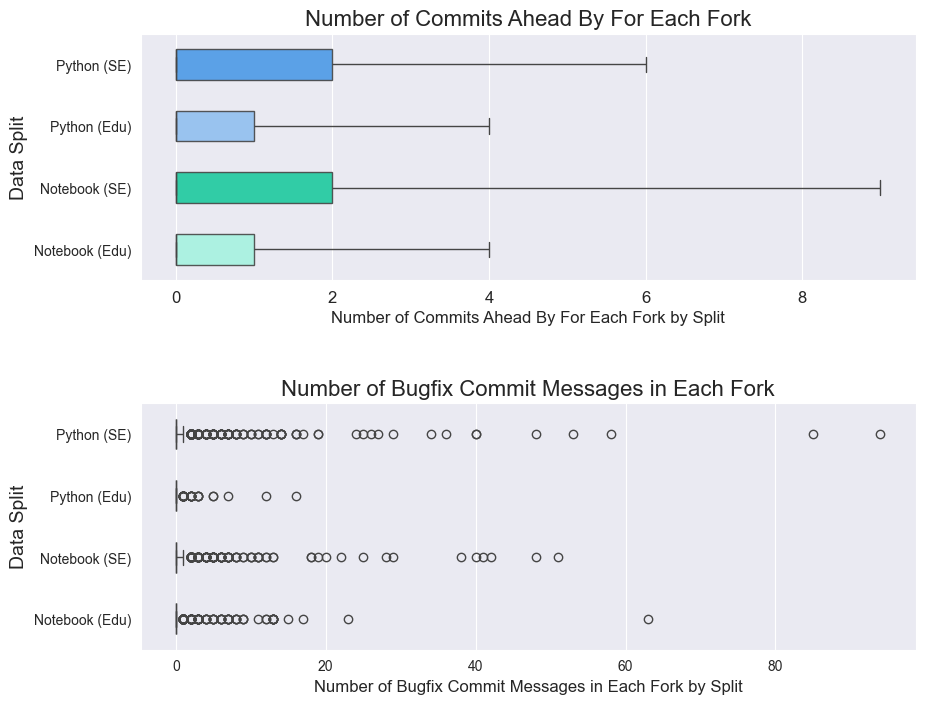

In [67]:

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

custom_palette = {
    'Python (SE)': '#3399ff',  # Shade of blue
    'Python (Edu)': '#80bfff',  # Lighter shade of blue
    'Notebook (SE)': '#00e6ac',  # Shade of purple
    'Notebook (Edu)': '#99ffe6',  # Lighter shade of purple
    'Kaggle': '#ff704d' #Salmon
}

sns.set_style("darkgrid")
sns.boxplot(data=all_forks, x="commits_ahead_by", y="split", 
            palette=custom_palette, whis=(10,90), showfliers = False, width=0.5,
            ax=axs[0],boxprops=dict(alpha=.9))
#axs[0].set_xscale('log')
#axs[0].xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
# axs[0].get_xaxis().set_major_formatter(LogFormatter(base=10, labelOnlyBase=False))
# axs[0].set_xticks([1, 2, 3, 4, 5])
# axs[0].set_xticklabels([1, 2, 3, 4, 5])
# axs[0].set_xticks([1, 2, 3, 4,5])
axs[0].tick_params(axis='x', labelsize=12)
axs[0].set_xlabel('Number of Commits Ahead By For Each Fork by Split', fontsize=12)
axs[0].set_title('Number of Commits Ahead By For Each Fork', fontsize=16)
axs[0].set_ylabel('Data Split', fontsize=14) 



sns.set_style("darkgrid")
sns.boxplot(data=all_forks, x="number_bugfix_msgs", y="split", 
            palette=custom_palette, whis=(0,90), showfliers = True, width=0.5,
            ax=axs[1], boxprops=dict(alpha=.9))
#axs[1].set_xscale('log')
#axs[1].xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
#axs[1].tick_params(axis='x', labelsize=12)
axs[1].set_xlabel('Number of Bugfix Commit Messages in Each Fork by Split', fontsize=12)
axs[1].set_title('Number of Bugfix Commit Messages in Each Fork', fontsize=16)
axs[1].set_ylabel('Data Split', fontsize=14)



plt.subplots_adjust(hspace=0.5)
#plt.tight_layout()
plt.savefig("boxplot_forks.pdf", format='pdf',bbox_inches='tight')
plt.show()
